In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import lag_plot
from pandas import datetime

In [2]:
#from sklearn.metrics import mean_squared_error
#pip install pmdarima
#from pmdarima.arima.utils import ndiffs
#import pmdarima as pm
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [3]:
df=pd.read_csv(r"C:\Users\HP-PC\Desktop\train_csv.csv")

In [4]:
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [5]:
df.tail()

,id,time,feature
75,75,2019-03-19 00:12:30,469.72
76,76,2019-03-19 00:12:40,406.79
77,77,2019-03-19 00:12:50,128.91
78,78,2019-03-19 00:13:00,85.28
79,79,2019-03-19 00:13:10,121.12


In [6]:
df.describe()

,id,feature
count,80.0000,80.000000
mean,39.5000,147.496375
std,23.2379,96.846260
min,0.0000,21.360000
25%,19.7500,66.730000
50%,39.5000,125.240000
75%,59.2500,199.820000
max,79.0000,469.720000


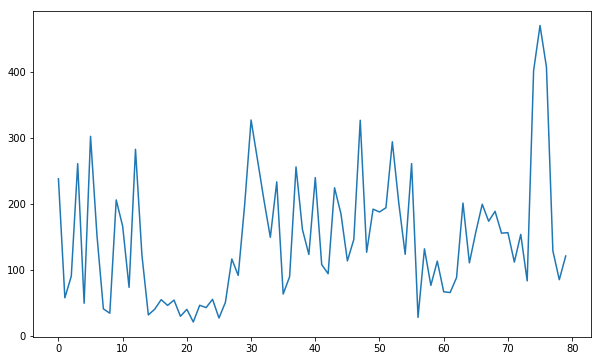

In [7]:
plt.plot(df['feature'])

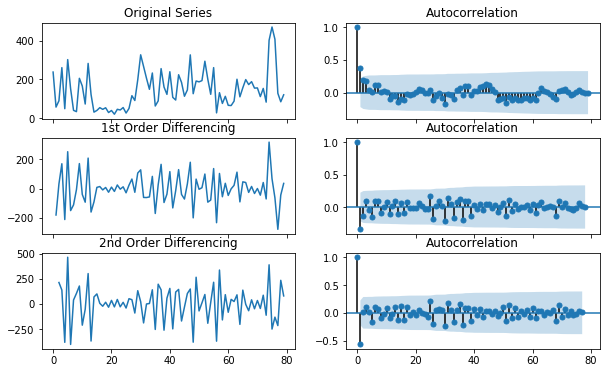

In [8]:
import statsmodels.graphics.tsaplots

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.feature); axes[0, 0].set_title('Original Series')
statsmodels.graphics.tsaplots.plot_acf(df.feature, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(df.feature.diff()); axes[1, 0].set_title('1st Order Differencing')
statsmodels.graphics.tsaplots.plot_acf(df.feature.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.feature.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
statsmodels.graphics.tsaplots.plot_acf(df.feature.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [9]:
result = ts.adfuller(df.feature.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.945866
p-value: 0.000000


E:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


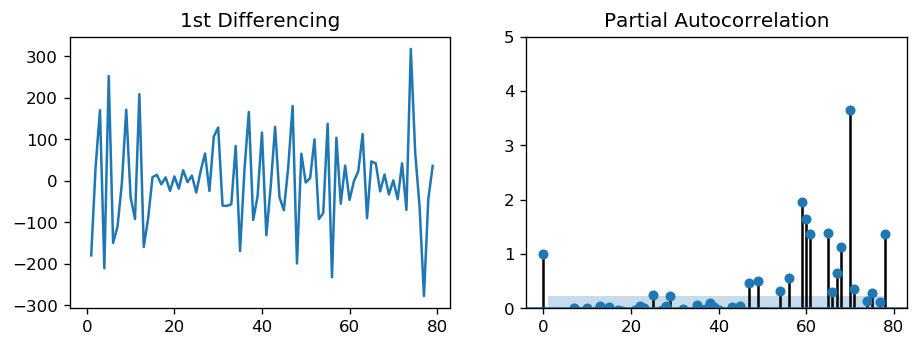

In [10]:
#PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.feature.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
statsmodels.graphics.tsaplots.plot_pacf(df.feature.diff().dropna(), ax=axes[1])

plt.show()

In [11]:
# 1,1,1 ARIMA Model
#model = ARIMA(df.feature, order=(1,1,1))
# 1,0,0 ARIMA Model
model = ARIMA(df.feature, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                feature   No. Observations:                   80
Model:                     ARMA(1, 0)   Log Likelihood                -472.781
Method:                       css-mle   S.D. of innovations             89.111
Date:                Thu, 30 Apr 2020   AIC                            951.562
Time:                        21:54:18   BIC                            958.708
Sample:                             0   HQIC                           954.427
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           147.9716     15.831      9.347      0.000     116.944     178.999
ar.L1.feature     0.3753      0.103      3.633      0.000       0.173       0.578
                                    Root

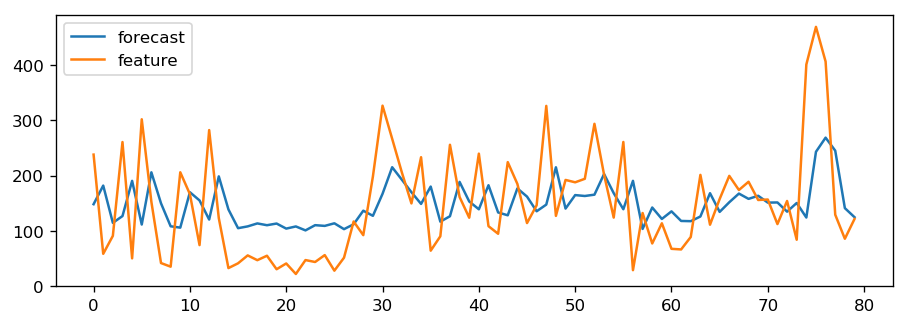

In [12]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False,plot_insample=True)
plt.show()

In [13]:
# Create Training and Test
train = df.feature[0:56]
test = df.feature[56:]

In [14]:
train, test

(0     237.97
 1      57.93
 2      90.53
 3     260.75
 4      49.70
 5     302.08
 6     152.25
 7      41.19
 8      34.61
 9     205.87
 10    166.23
 11     73.75
 12    282.46
 13    122.71
 14     32.04
 15     40.73
 16     55.06
 17     46.40
 18     54.46
 19     29.97
 20     40.43
 21     21.36
 22     46.59
 23     43.11
 24     55.62
 25     27.36
 26     50.94
 27    116.61
 28     91.80
 29    198.32
 30    326.76
 31    266.69
 32    205.95
 33    149.42
 34    233.22
 35     63.63
 36     89.77
 37    255.79
 38    161.08
 39    123.41
 40    239.69
 41    108.12
 42     94.31
 43    224.30
 44    184.75
 45    113.74
 46    146.06
 47    326.35
 48    126.81
 49    192.00
 50    187.70
 51    194.04
 52    293.84
 53    201.54
 54    123.67
 55    260.87
 Name: feature, dtype: float64, 56     28.26
 57    131.97
 58     76.73
 59    113.35
 60     67.01
 61     65.89
 62     88.47
 63    201.17
 64    110.79
 65    157.37
 66    199.37
 67    173.72
 68    188.69
 69

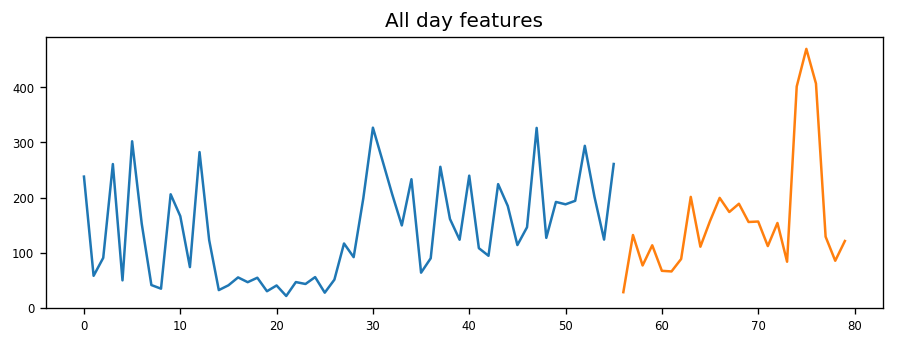

In [15]:
train.plot( title= 'All day features', fontsize=7) 
test.plot( title= 'All day features', fontsize=7) 
plt.show()

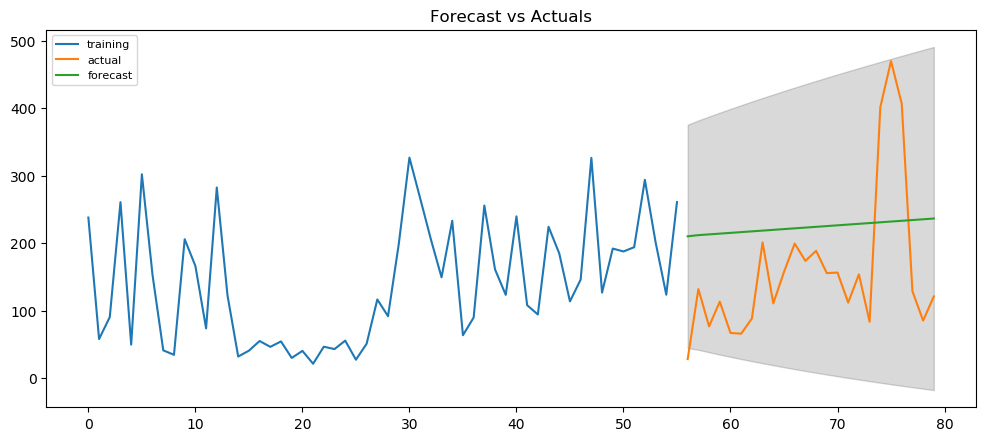

In [16]:
# Build Model 
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(24, alpha=0.05)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [17]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({ 'rmse':rmse})

forecast_accuracy(fc, test)

{'rmse': 122.93152824105744}

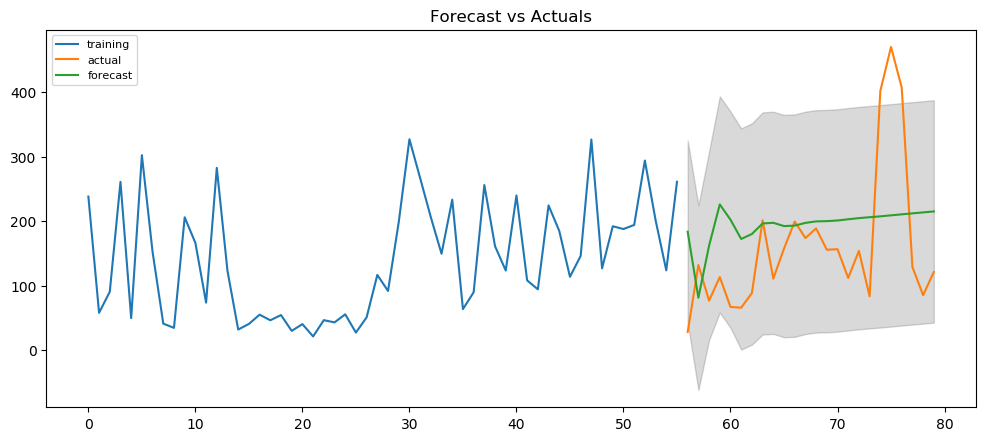

In [18]:
# Build Model 
model = ARIMA(train, order=(2,1,4))
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(24, alpha=0.05)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [19]:
#Accuracy metrics
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({ 'rmse':rmse})

forecast_accuracy(fc, test)

{'rmse': 111.82856512251536}